# Análise exploratoria de dados

No notebook anterior, realizamos a importação, seleção, tratamento e limpeza dos dados de três DataFrames, consolidando tudo em um único DataFrame para facilitar a análise.

Agora, daremos início à análise exploratória de dados (EDA), uma etapa essencial em projetos de ciência de dados. Esse processo nos permite compreender melhor o conjunto de dados por meio de estatísticas descritivas e visualizações, ajudando a identificar padrões, tendências e possíveis inconsistências.

Para isso, examinaremos cada coluna e analisaremos as informações que elas podem revelar sobre o dataset.

## Importação das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## Importação dos dados

In [10]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv('/content/mexico-real-estate-clean.csv')

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (19613, 6)


,property_type,surface_covered_in_m2,price_aprox_usd,state,lat,lon
0,apartment,54.0,289775.66,Distrito Federal,23.634501,-102.552788
1,house,80.0,79661.96,Distrito Federal,19.310330,-99.068557
2,apartment,100.0,48822.82,Distrito Federal,19.279771,-99.234597
3,apartment,135.0,337720.36,Distrito Federal,23.634501,-102.552788
4,apartment,263.0,875000.00,Quintana Roo,21.190264,-86.819838


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17841 entries, 0 to 19612
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          17841 non-null  object 
 1   surface_covered_in_m2  17841 non-null  float64
 2   price_aprox_usd        17841 non-null  float64
 3   state                  17841 non-null  object 
 4   lat                    17841 non-null  float64
 5   lon                    17841 non-null  float64
dtypes: float64(4), object(2)
memory usage: 975.7+ KB


In [12]:
df.dropna(inplace=True)

Embora nosso DataFrame tenha apenas dois tipos de dados (object e float64), podemos classificá-los em três categorias: localização, categóricos e numéricos. Cada uma dessas categorias exige uma abordagem específica na análise exploratória.

# Dados de Localização: "lat" and "lon"

Dizem que a localização é o fator mais importante no mercado imobiliário. Podemos visualizar onde os imóveis estão situados no México utilizando as colunas "lat" e "lon". Como latitude e longitude seguem um sistema de coordenadas, uma excelente forma de representá-las é por meio de um gráfico de dispersão sobre um mapa. Para isso, uma ótima ferramenta é a função scatter_mapbox da biblioteca Plotly.

In [14]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat='lat',
    lon='lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

Ao analisar esse mapa, os imóveis do nosso dataset não estão distribuídos de maneira uniforme havendo estados e regiões com maior concentração. Com base nessa distribuição, conseguimos identificar onde estão as maiores cidades do México.

## Dados Categoricos: "state"

Embora o mapa nos dê uma boa noção de quais estados são mais frequentes no dataset, podemos obter a contagem exata analisando a coluna "state".

In [15]:
# Get value counts of "state" column
df['state'].value_counts().head(10)

,count
state,
Distrito Federal,14605
Quintana Roo,2888
Solidaridad,200
Zacatecas,85
Benito Juárez,56
Othón P. Blanco,5
Mexicali,2


## Dados Numericos: "surface_covered_in_m2 " e "price_aprox_usd"

Já temos uma ideia da localização dos imóveis no nosso dataset, mas quanto eles custam? Qual é o tamanho deles? A melhor forma de responder a essas perguntas é por meio de estatísticas descritivas.

In [16]:
# Describe "area_m2", "price_usd" columns
round(df[['surface_covered_in_m2', 'price_aprox_usd']].describe(), 2)

,surface_covered_in_m2,price_aprox_usd
count,17841.00,17841.00
mean,4309.69,269911.24
std,493145.00,528995.90
min,0.00,5796.88
25%,69.00,62170.05
50%,100.00,129674.58
75%,208.00,258988.23
max,65748000.00,20080645.00


Vamos começar analisando a coluna "area_m2". Um ponto interessante é que a média é maior que a mediana (também conhecida como o quartil de 50%). Ambas deveriam representar um valor "típico" para essa variável, então por que há uma diferença de  755 m² entre elas?

Para responder a essa pergunta, precisamos entender como os tamanhos dos imóveis estão distribuídos no dataset. Para isso, vamos utilizar duas formas de visualização: um histograma e um boxplot.

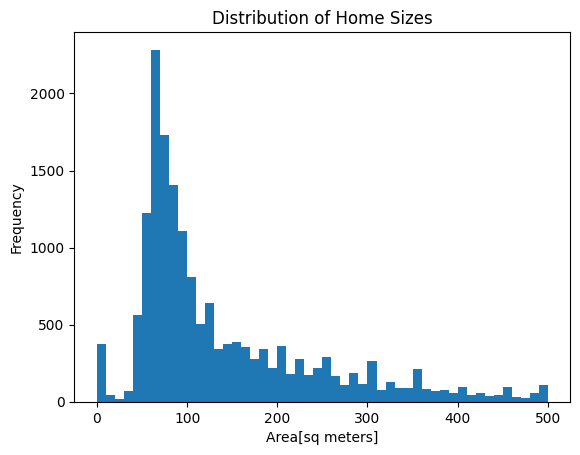

In [17]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df['surface_covered_in_m2'], bins=50, range=(0,500))

# Add x-axis label
plt.xlabel('Area[sq meters]')

# Add y-axis label
plt.ylabel('Frequency')

# Add title
plt.title('Distribution of Home Sizes');

Observando nosso histograma, podemos perceber que "surface_covered_in_m2" apresenta uma distribuição assimétrica à direita. Ou seja, há mais casas na faixa inferior da distribuição (50–200m2) do que na faixa superior (250–400m2). Isso explica a diferença entre a média e a mediana.

A presença de outliers distorceu a visualização, tornando necessário limitar o intervalo de tamanhos entre 0 e 500 para melhor representar os dados.

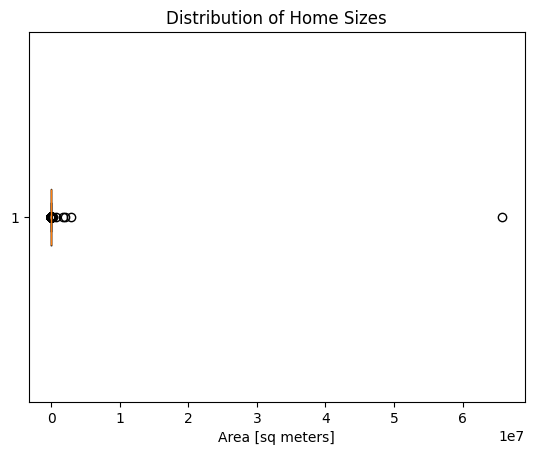

In [18]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df['surface_covered_in_m2'], vert=False)

# Add x-axis label
plt.xlabel('Area [sq meters]')

# Add title
plt.title('Distribution of Home Sizes');

Vamos tratar os outliars e vizualizar novamentes

In [19]:
#tratando outliars usando o IQR (Intervalo Interquartil)
Q1 = df['surface_covered_in_m2'].quantile(0.25)
Q3 = df['surface_covered_in_m2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['surface_covered_in_m2'] >= lower_bound) & (df['surface_covered_in_m2'] <= upper_bound)]

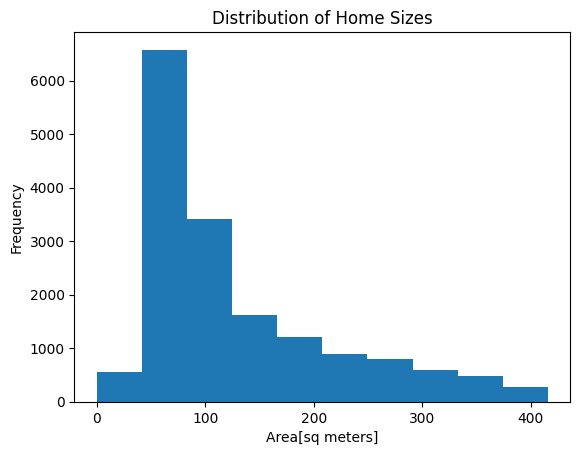

In [20]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df['surface_covered_in_m2'])

# Add x-axis label
plt.xlabel('Area[sq meters]')

# Add y-axis label
plt.ylabel('Frequency')

# Add title
plt.title('Distribution of Home Sizes');

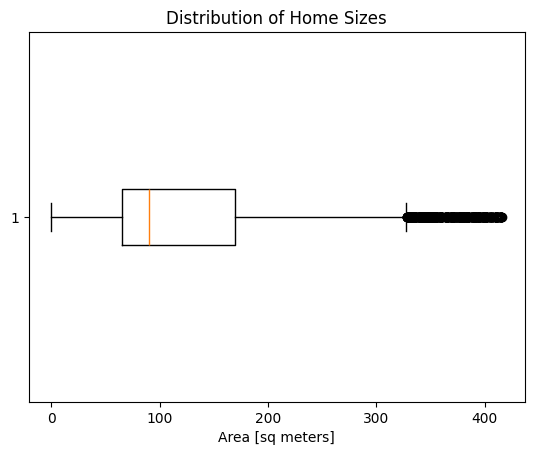

In [21]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df['surface_covered_in_m2'], vert=False)

# Add x-axis label
plt.xlabel('Area [sq meters]')

# Add title
plt.title('Distribution of Home Sizes');

Vamos usar as mesmas duas ferramentas de visualização para verificar se "price_aprox_usd" tem a mesma distribuição que "surface_covered_in_m2".

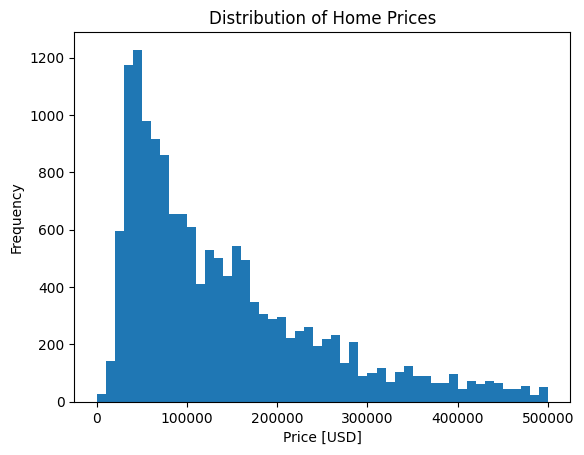

In [22]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df['price_aprox_usd'], bins=50, range=(0, 500000))

# Add x-axis label
plt.xlabel('Price [USD]')

# Add y-axis label
plt.ylabel('Frequency')

# Add title
plt.title('Distribution of Home Prices');

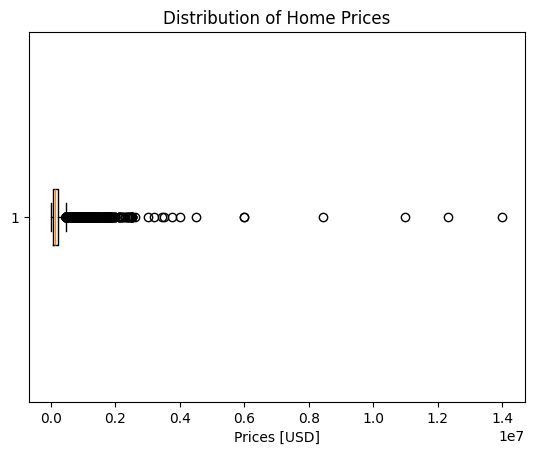

In [23]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df['price_aprox_usd'], vert=False)

# Add x-label axis
plt.xlabel('Prices [USD]')

# Add y-label axis
plt.title('Distribution of Home Prices');

Tratando outliars

In [24]:
#tratando outliars usando o IQR (Intervalo Interquartil)
Q1 = df['price_aprox_usd'].quantile(0.25)
Q3 = df['price_aprox_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price_aprox_usd'] >= lower_bound) & (df['price_aprox_usd'] <= upper_bound)]

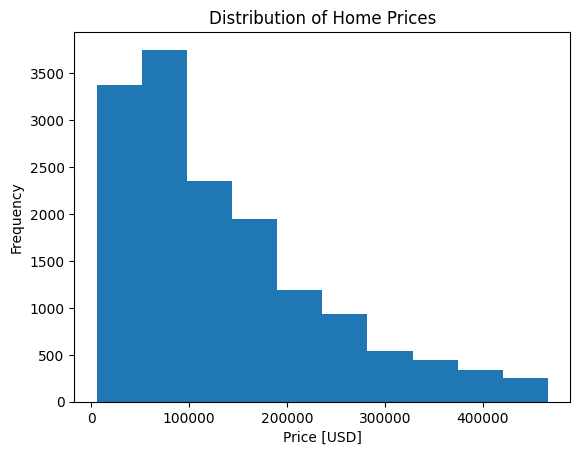

In [25]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df['price_aprox_usd'])

# Add x-axis label
plt.xlabel('Price [USD]')

# Add y-axis label
plt.ylabel('Frequency')

# Add title
plt.title('Distribution of Home Prices');

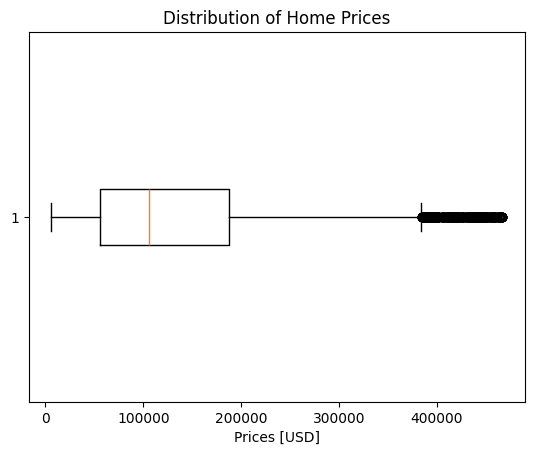

In [26]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df['price_aprox_usd'], vert=False)

# Add x-label axis
plt.xlabel('Prices [USD]')

# Add y-label axis
plt.title('Distribution of Home Prices');

Agora que já temos uma boa compreensão do conjunto de dados, no próximo notebook vamos responder algumas perguntas de pesquisa sobre a relação entre o tamanho da casa, o preço e a localização.